# W5 Lab Assignment

This lab covers some fundamental plots of 1-D data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set_style('white')

%matplotlib inline 

# Q1 1-D Scatter Plot


## Using fake data

Remember that, if you want to play with visualization tools, you can use not only the real data, but also fake data. Actually it is a nice way to experiment because you can control every aspect of data. Let's create some random numbers. 

The function [**`np.random.randn()`**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html) generates a sample with size $N$ from the [standard normal distribution](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution).

In [2]:
print( np.random.rand(10) )

[ 0.60774814  0.04058545  0.2035344   0.10582451  0.33250652  0.10518481
  0.0763476   0.53416502  0.53337822  0.87510873]


The following small function generates $N$ normally distributed numbers:

In [3]:
def generate_many_numbers(N=10, mean=5, sigma=3):
    return mean + sigma * np.random.randn(N)

Generate 10 normally distributed numbers with mean 5 and sigma 3:

In [4]:
data = generate_many_numbers(N=10)
print(data)

[ 6.18798006  5.38692682  3.90973667  4.27499929  3.24658302  5.59346525
  3.90893145 -0.64683078  1.31117398  7.7391911 ]


The most immediate method to visualize 1-D data is just plotting it. Here we can use the [**`scatter()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) function to draw a scatter plot. The most basic usage of this function is to provide x and y.

[ 1  2  3  4  5  6  7  8  9 10]
[ 6  7  8  9 10 11 12 13 14 15]


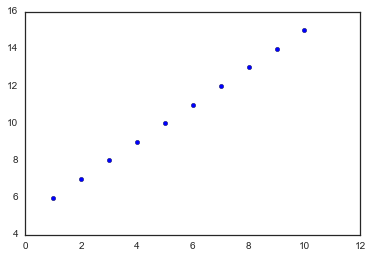

In [5]:
x = np.arange(1,11)
y = x + 5
print(x)
print(y)
plt.scatter(x, y)

But here we only have x (the generated data). We can set the y values to 0. The [**`np.zeros_like(data)`**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html) function creates a numpy array (list) that have the same dimension as the argument.

In [6]:
print(np.zeros_like(data))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


Now let's plot the generated 1-D data.

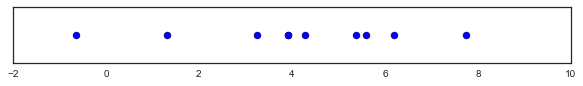

In [7]:
plt.figure(figsize=(10,1)) # set figure size, width = 10, height = 1
plt.scatter(data, np.zeros_like(data), s=50) # set size of symbols to 50. Change it and see what happens. 
plt.gca().axes.get_yaxis().set_visible(False) # set y axis invisible

Ok, I think we can see all data points. But what if we have more numbers?

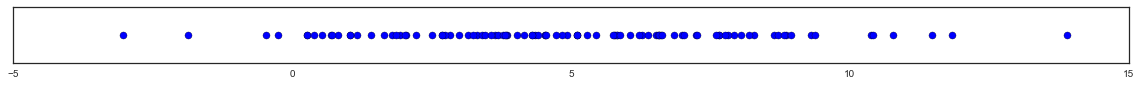

In [8]:
# TODO: generate 100 numbers and plot them in the same way. 
data = generate_many_numbers(N=100)
plt.figure(figsize=(20,1)) # set figure size, width = 10, height = 1
plt.scatter(data, np.zeros_like(data), s=50) # set size of symbols to 50. Change it and see what happens. 
plt.gca().axes.get_yaxis().set_visible(False) # set y axis invisible

Of course we can't see much at the center. We can add "jitters" using the [**`np.random.rand()`**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html) function.  

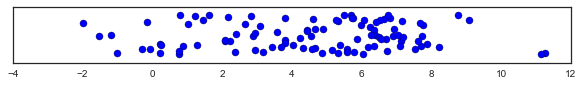

In [10]:
data = generate_many_numbers(N=100)

# TODO: create a list of 100 random numbers using np.random.rand()
zittered_ypos = np.random.rand(100)

plt.figure(figsize=(10,1))
plt.scatter(data, zittered_ypos, s=50)
plt.gca().axes.get_yaxis().set_visible(False)

Let's also make the symbol transparent. Here is [a useful Google query](https://www.google.com/search?client=safari&rls=en&q=matplotlib+scatter+transparent+symbole&ie=UTF-8&oe=UTF-8#q=matplotlib+scatter+transparent+symbol), and the documentation of [**`scatter()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) also helps.

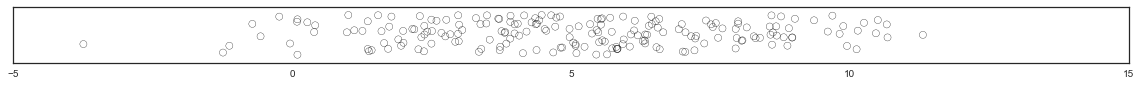

In [13]:
data = generate_many_numbers(N=200)

# From the last question
zittered_ypos = np.random.rand(200)

# TODO: implement this
plt.figure(figsize=(20,1))
plt.scatter(data, zittered_ypos, s = 50, facecolors='none')
plt.gca().axes.get_yaxis().set_visible(False)

We can use transparency as well as empty symbols.

* Increase the number of points to 1,000
* Set the symbol empty and edgecolor red ([a useful query](https://www.google.com/search?client=safari&rls=en&q=matplotlib+scatter+empty+symbols&ie=UTF-8&oe=UTF-8))

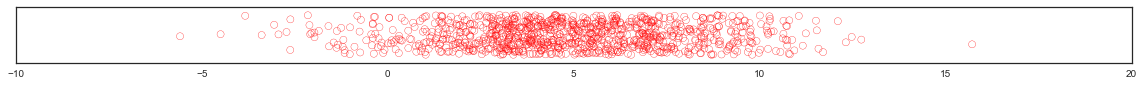

In [14]:
# TODO: implement this
data = generate_many_numbers(N=1000)
zittered_ypos = np.random.rand(1000)


# TODO: implement this
plt.figure(figsize=(20,1))
plt.scatter(data, zittered_ypos, s = 50, facecolors='none', edgecolors='r')
plt.gca().axes.get_yaxis().set_visible(False)

## Lots and lots of points

Let's use real data. Load the IMDb dataset that we used before.

In [16]:
movie_df = pd.read_csv('imdb.csv', delimiter='\t')
movie_df.head()

,Title,Year,Rating,Votes
0,!Next?,1994,5.4,5
1,#1 Single,2006,6.1,61
2,#7DaysLater,2013,7.1,14
3,#Bikerlive,2014,6.8,11
4,#ByMySide,2012,5.5,13


Try to plot the 'Rating' information using 1D scatter plot. Does it work?

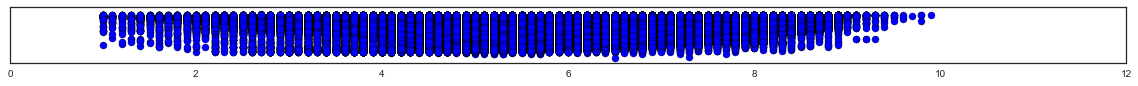

In [22]:
# TODO: plot 'rating'
plt.figure(figsize=(20,1)) 
plt.scatter(movie_df['Rating'], movie_df['Year'], s=50)  
plt.gca().axes.get_yaxis().set_visible(False) 

# Q2 Histogram 

There are too many data points! Let's try histogram. Actually `pandas` supports plotting through `matplotlib` and you can directly visualize dataframes and series. 


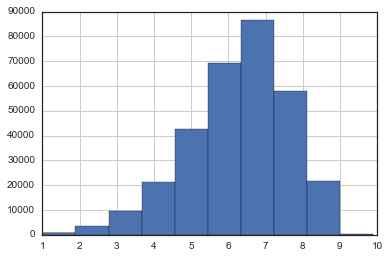

In [23]:
movie_df['Rating'].hist()

Looks good! Can you increase or decrease the number of bins? Find the documentation [here](https://www.google.com/search?client=safari&rls=en&q=pandas+plotting&ie=UTF-8&oe=UTF-8). 

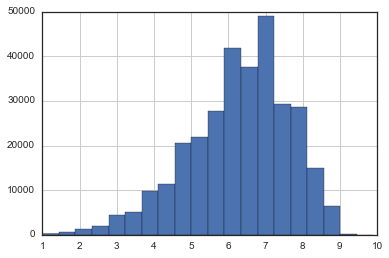

In [24]:
# TODO: try different number of bins
movie_df['Rating'].hist(bins=20)

# Q3 Boxplot

Now let's try boxplot. We can use pandas' plotting functions. The usages of boxplot is [here](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#visualization-box).

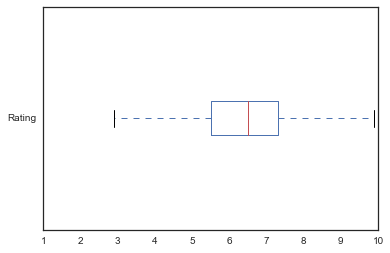

In [25]:
movie_df['Rating'].plot(kind='box', vert=False)

Or try seaborn's [**`boxplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html) function:

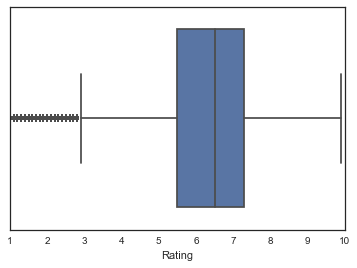

In [26]:
sns.boxplot(movie_df['Rating'])

We can also easily draw a series of boxplots grouped by categories. For example, let's do the boxplots of movie ratings for different decades.

In [27]:
df = movie_df.sort('Year')
df.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Title,Year,Rating,Votes
215207,Passage de Venus,1874,6.5,174
234798,Sallie Gardner at a Gallop,1878,7.3,452
186796,Man Walking Around the Corner,1887,5.1,365
57131,Accordion Player,1888,5.7,433
232543,Roundhay Garden Scene,1888,7.7,3451


One easy way to transform a particular year to the decade (e.g., 1874 -> 1870): divide by 10 and multiply it by 10 again. 

In Python 3, the `//` operator is used for integer division.

In [28]:
print(1874//10)
print(1874//10*10)
decade = (df['Year']//10) * 10
decade.head()

187
1870


215207    1870
234798    1870
186796    1880
57131     1880
232543    1880
Name: Year, dtype: int64

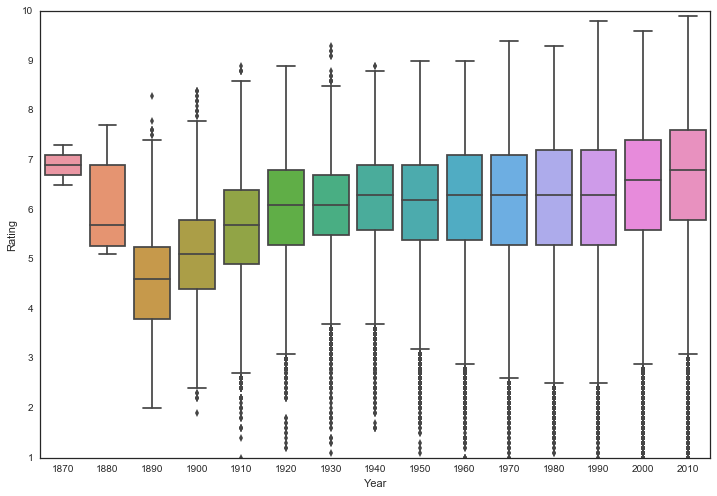

In [29]:
ax = sns.boxplot(x=decade, y=df['Rating'])
ax.figure.set_size_inches(12, 8)

Can you draw boxplots of movie votes for different decade?

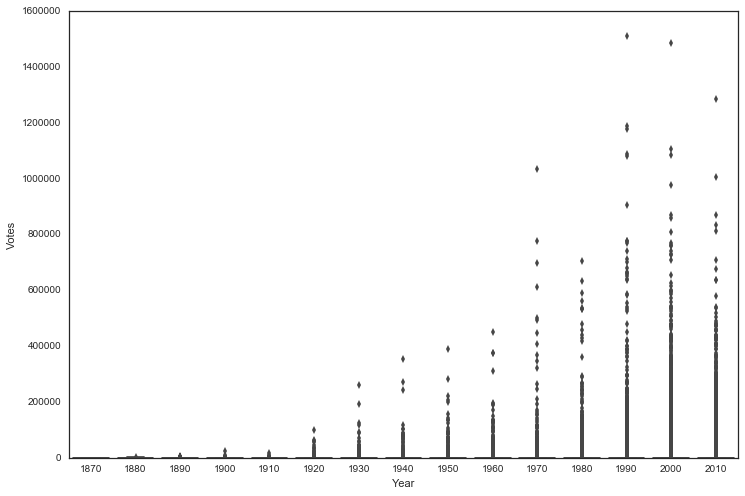

In [30]:
# TODO
ax = sns.boxplot(x=decade, y=df['Votes'])
ax.figure.set_size_inches(12, 8)

What do you see? Can you actually see the "box"? The number of votes span a very wide range, from 1 to more than 1.4 million. One way to deal with this is to make a log-transformation of votes, which can be done with the [**`numpy.log()`**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html) function.

In [31]:
log_votes = np.log(df['Votes'])
log_votes.head()

215207    5.159055
234798    6.113682
186796    5.899897
57131     6.070738
232543    8.146419
Name: Votes, dtype: float64

Can you draw boxplots of log-transformed movie votes for different decade?

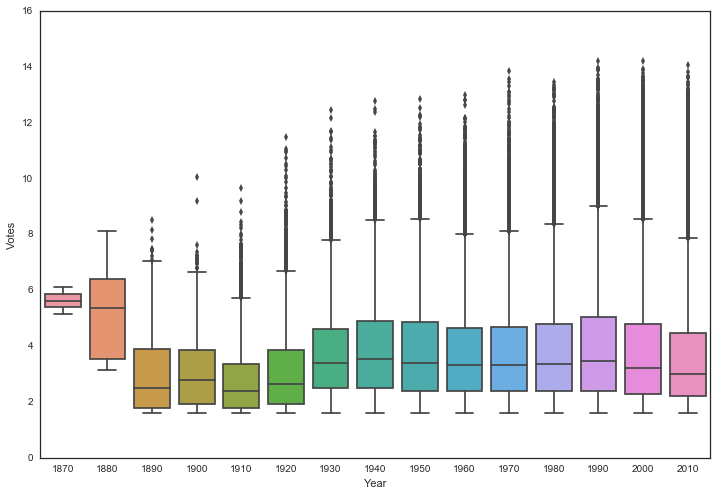

In [33]:
# TODO
ax = sns.boxplot(x=decade, y=log_votes)
ax.figure.set_size_inches(12, 8)